# Polynomial Regression

The correlation between the variables are not always linear, to handle these cases we use polynomials to represent the realtions

### Aim
To find the price of a speaker system based on the required output power.


### Data 
The data used in this example is generated in using a python program.

The Data is about the **price in Euros** of a speaker and the sound **output in Watts** of the same.

**Note** : The data used generated using a python program.

### Libraries Used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
from pylab import *

%matplotlib inline

### Loading the Data

In [2]:
# Data saved in the same folder
df = pd.read_csv("Data/SpeakerPrice.csv")
df.columns

Index(['Name', 'Price', 'Watt'], dtype='object')

The Dataset contains Name, Price and Power in watts, We can ignore the values in the column **Name** in this use-case

### Plot of 'Power Vs Price'
We are checking if any correlation exists between power and the price of the speakers


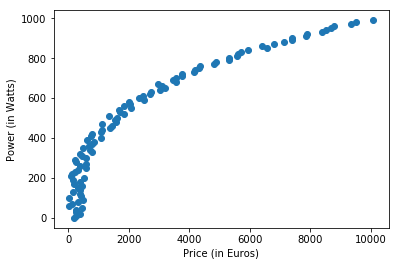

In [3]:
scatter(df['Price'] , df['Watt'] )
# Adding labels
plt.xlabel("Price (in Euros)")
plt.ylabel("Power (in Watts)")

#### Observation :
we can observe that there is a non-linear correlation between Price and Power. <br>
In the data set, we can observe as the power rating **increases**, the variance in the inflation of the price **decreases**. <br> Hence a polynomial regression has to be used to predict the price based on the power.

#### Polynomial function :

Creating a polynomial funtion with **degree 2** to **degree 7** to find the which degree polynomial is optimal

In [4]:
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 2))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 2 : " , r2)
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 3))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 3 : " , r2)
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 4))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 4 : " , r2)
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 5))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 5 : " , r2)
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 6))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 6 : " , r2)
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 7))
r2 = r2_score(df['Watt'], Line(df['Price']))
print("R2 vlaue for Polynomial Function with degree 7 : " , r2)

R2 vlaue for Polynomial Function with degree 2 :  0.928117266305
R2 vlaue for Polynomial Function with degree 3 :  0.949112792833
R2 vlaue for Polynomial Function with degree 4 :  0.954367870307
R2 vlaue for Polynomial Function with degree 5 :  0.95509373442
R2 vlaue for Polynomial Function with degree 6 :  0.955094092989
R2 vlaue for Polynomial Function with degree 7 :  0.955664913525


#### **Observation** :
The improvement we achieve by increasing the **degree** of  the polynomial from **4** and above do not yeild much improvement in **r2 score**. <br>
Hence the **Polynomial degree = 5** will be set for this dataset
### Plotting

Fitting a polynomial function and plotting the same

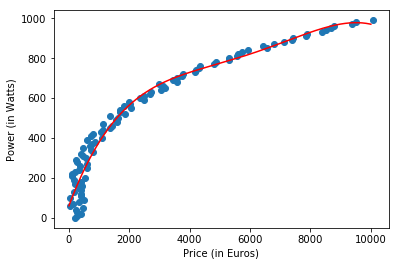

In [5]:
Line = np.poly1d(np.polyfit(df['Price'], df['Watt'], 4))
### plotting the polynomial Function (red line)
ls = np.linspace(0, 10000, 1000)

### the values of Price vs Power is added to the grapgh
plt.scatter(df['Price'], df['Watt'])

### Labels
plt.xlabel("Price (in Euros)")
plt.ylabel("Power (in Watts)")

### the Line is drawn
plt.plot(ls, Line(ls), c='r')

### printing the graph
plt.show()

### Polynomial Function used

In [6]:
Line

poly1d([ -4.60905628e-13,   1.10984448e-08,  -9.61617248e-05,
         4.03585669e-01,   6.10130389e+01])

 This represents the following polynomial function <br>
 
**-4.60905628e-13 * x ^ 4 + 1.10984448e-08 * x ^ 3 + -9.61617248e-05 * x ^ 2 + 4.03585669e-01 * x + 6.10130389e+01**

### Prediction 
A customer want to check the estimated price of a system with a power requirement of **5000 Watts**

In [7]:
power=5000
estimated_price = Line(power)
print(estimated_price)

774.137843981


### Conclusion

According to the Current model, 
the approximate price to be expected is **~769.80 Euro** <br>
for a new speaker with **power 5000 Watts**